In [1]:
import sklearn
import pandas as pd

# import d6tflow tasks
import tasks

Welcome to d6tflow! For Q&A see https://github.com/d6t/d6tflow
Welcome to d6tpipe!


In [6]:
import d6tflow
d6tflow.run(tasks.TaskTrain(), confirm=False, forced_all=True)


===== Luigi Execution Summary =====

Scheduled 2 tasks of which:
* 1 complete ones were encountered:
    - 1 TaskPreprocess(dt_start=2010-01-01, dt_end=2020-01-01, do_preprocess=True)
* 1 ran successfully:
    - 1 TaskTrain(dt_start=2010-01-01, dt_end=2020-01-01, do_preprocess=True)

This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



LuigiRunResult(status=<LuigiStatusCode.SUCCESS: (':)', 'there were no failed tasks or missing dependencies')>,worker=<luigi.worker.Worker object at 0x0000020525269488>,scheduling_succeeded=True)

In [2]:
model = tasks.TaskTrain().output().load()
df_train = tasks.TaskPreprocess().output().load()
print(sklearn.metrics.accuracy_score(df_train['y'],model.predict(df_train.iloc[:,:-1])))

C:\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
1.0


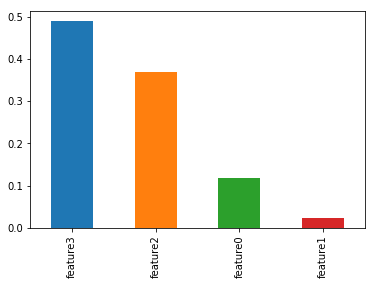

In [4]:
df_importance = pd.Series(model.feature_importances_, index=df_train.iloc[:,:-1].columns)
import matplotlib.pyplot as plt
df_importance.sort_values(ascending=False).plot.bar()



In [ ]:
# save figure
plt.savefig('reports/plot.png')